In [1]:
%matplotlib notebook
import hyperspy.api as hs
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#data file path
fp = r'/dls/science/groups/e02/Sample_data/sample_EELS_EDS_new/EDS Spectrum Image.dm4'
SI = hs.load(fp)

<IPython.core.display.Javascript object>


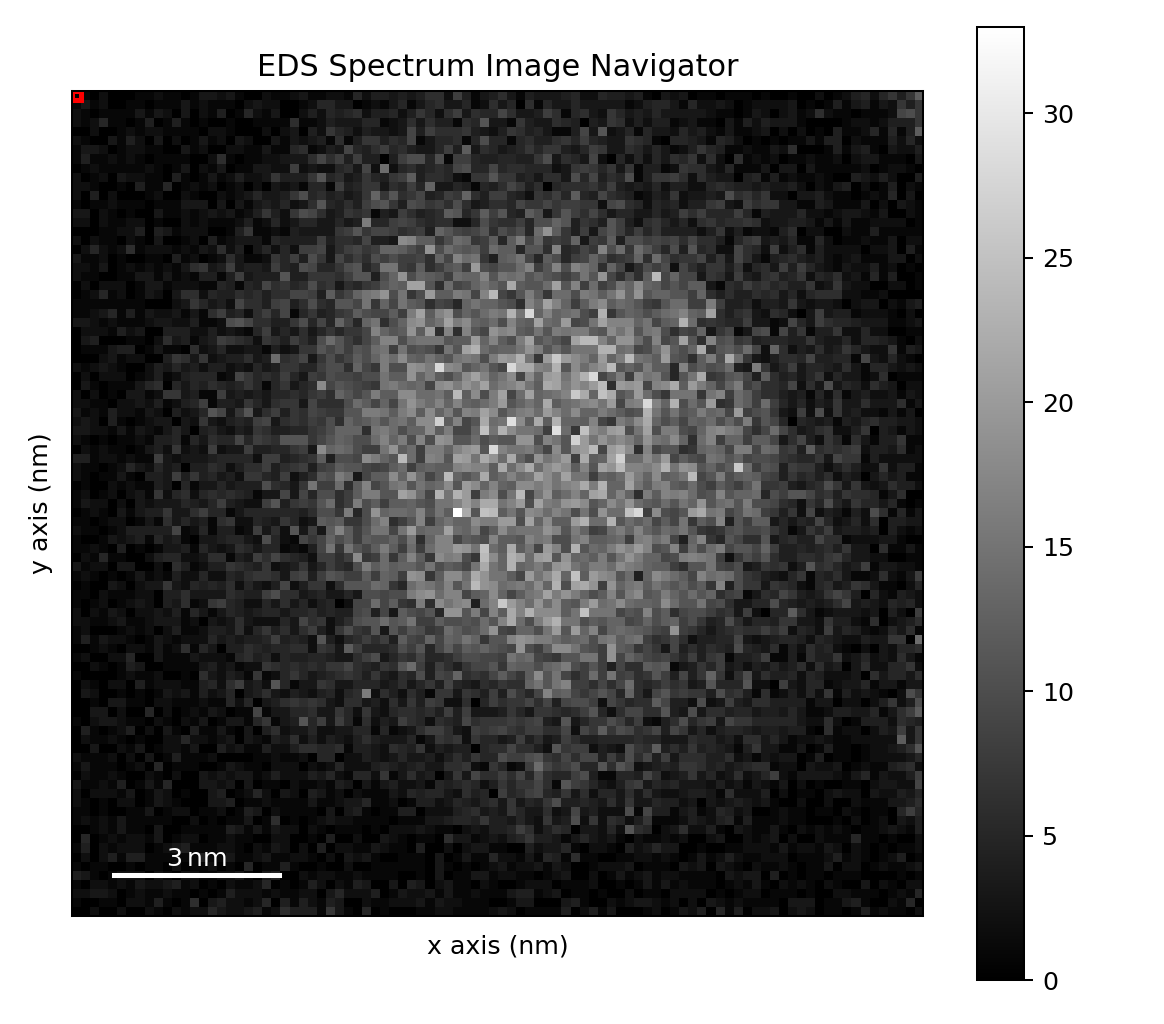

<IPython.core.display.Javascript object>


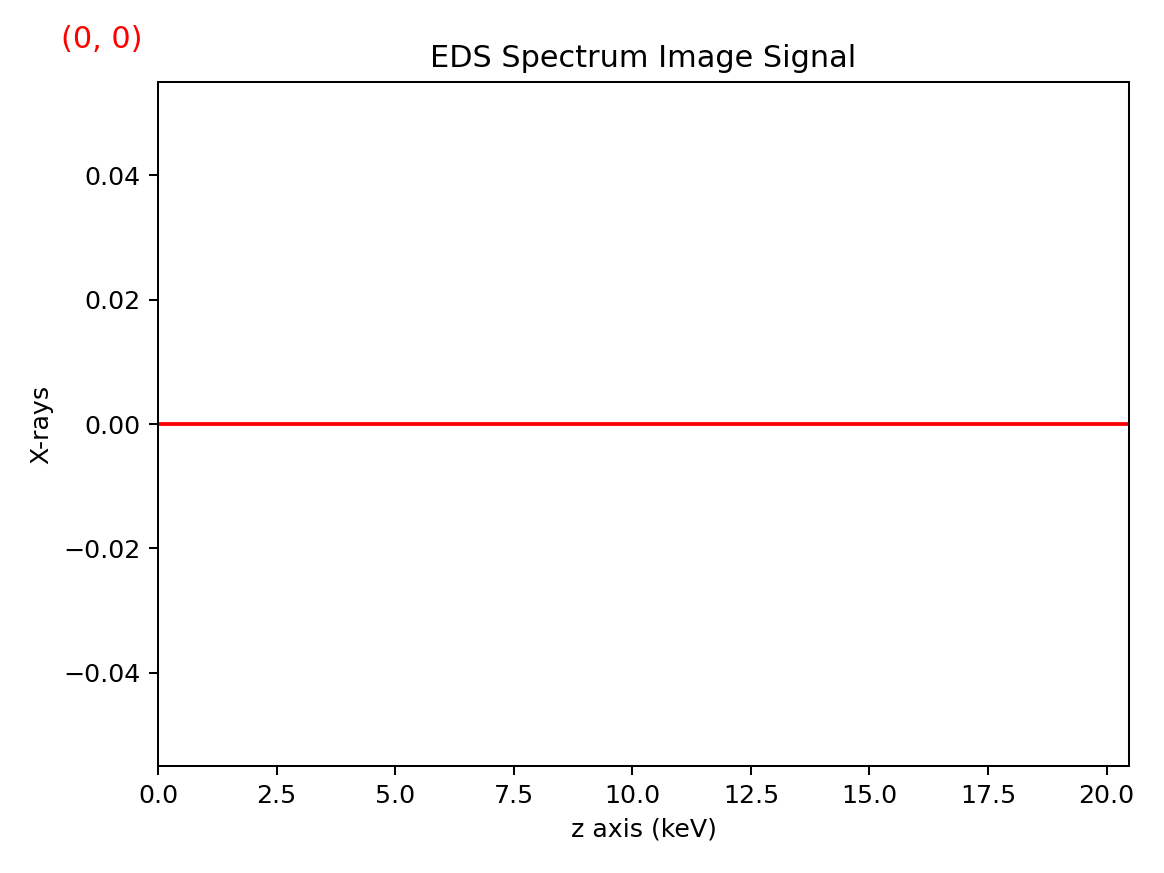

In [3]:
SI.plot()

<IPython.core.display.Javascript object>


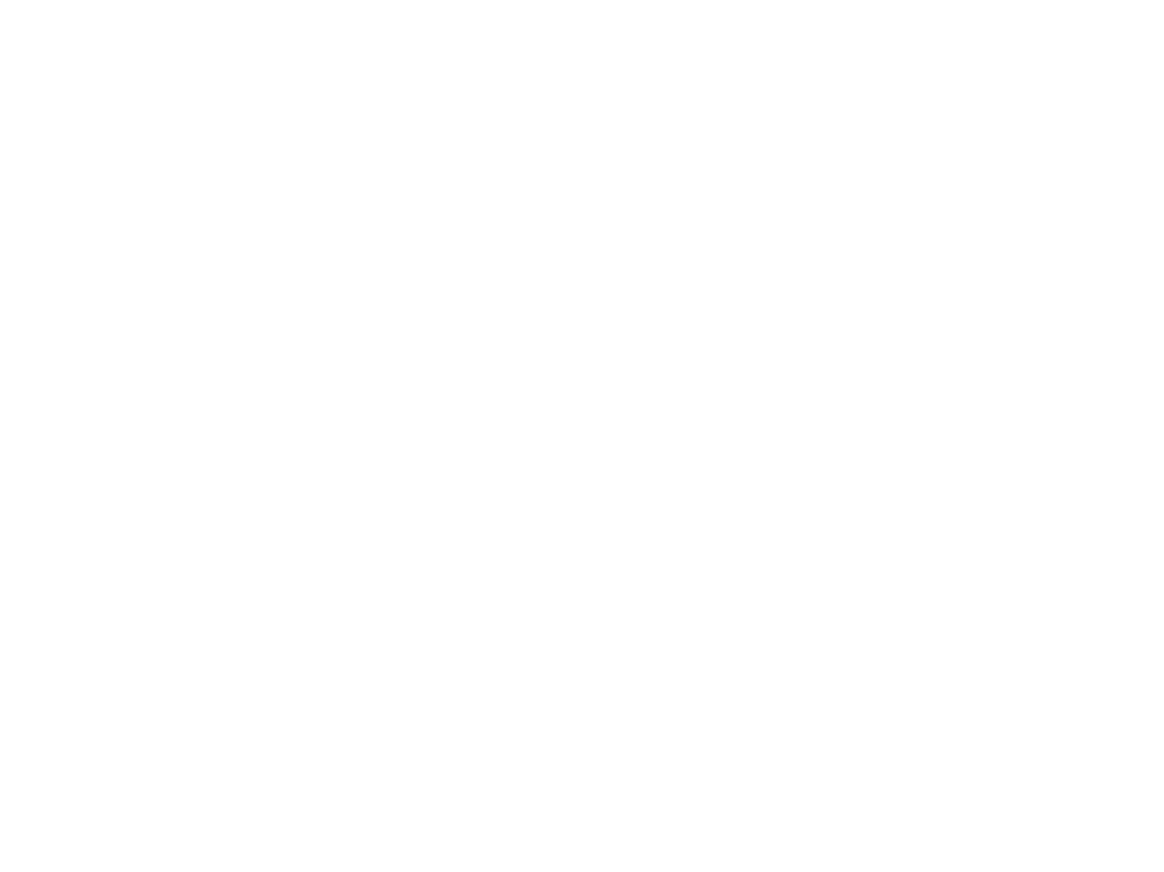

In [4]:
SI_sum = SI.sum()
SI_sum.plot()

<IPython.core.display.Javascript object>


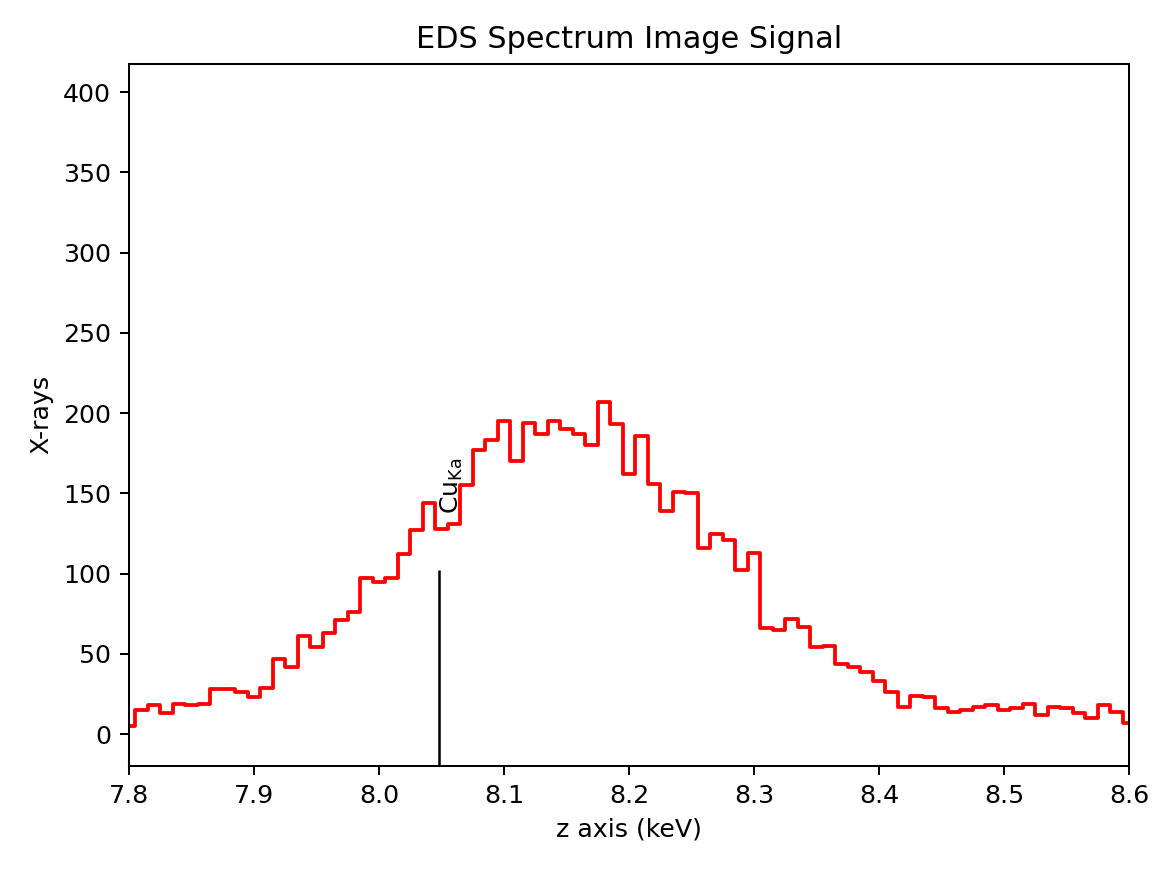

(7.8, 8.6)

In [5]:
#add Cu peak for calibration
SI_sum.add_elements(['Cu'])
SI_sum.add_lines(['Cu_Ka'])
SI_sum.plot(True)
plt.xlim([7.8, 8.6])

<IPython.core.display.Javascript object>


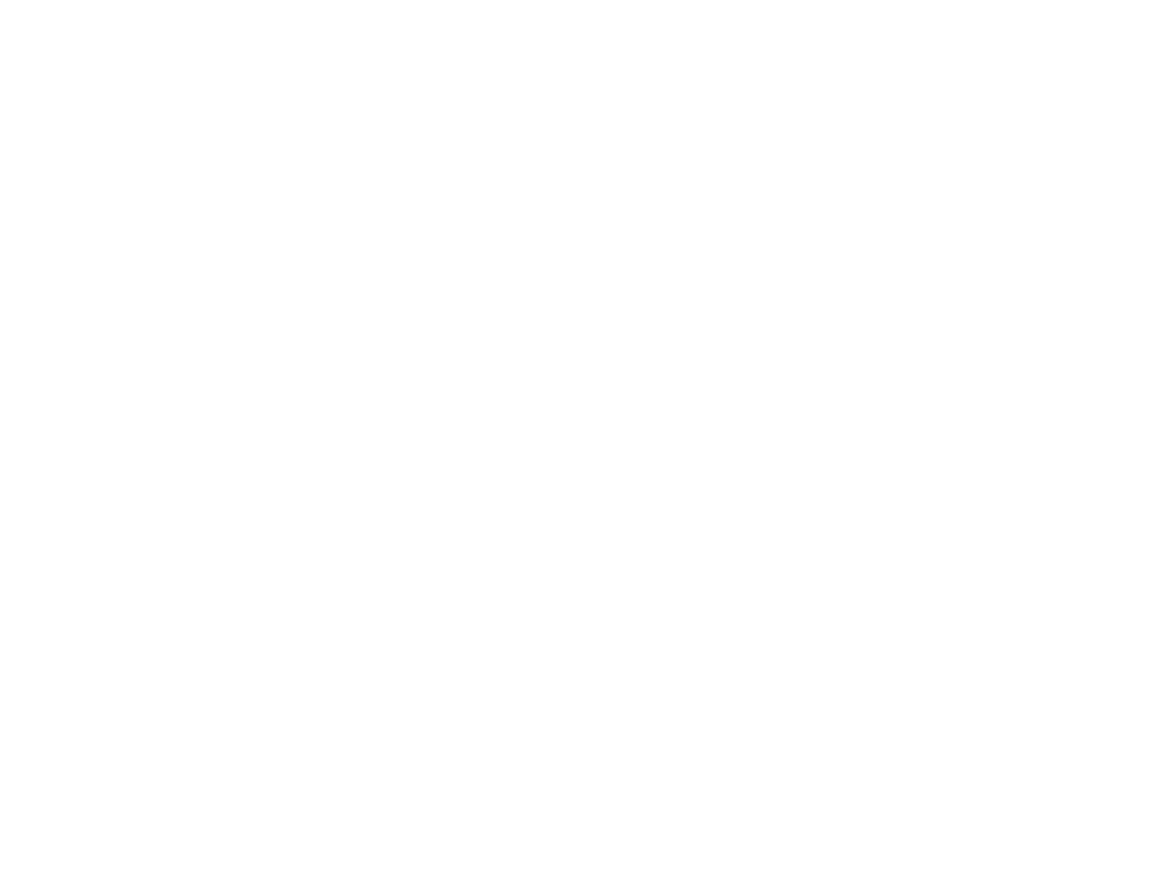

/tmp/ipykernel_40017/1704692033.py:5: DeprecationWarning: use "HasTraits.trait_get" instead
  real_Cu_pos = m_Cu.components.Cu_Ka.centre.get()['value'] # get expected Cu position


In [6]:
#fit to Cu peak
SI_sum_Cu = SI_sum.isig[7.5:8.6]
SI_sum_Cu.plot(True)
m_Cu = SI_sum_Cu.create_model()
real_Cu_pos = m_Cu.components.Cu_Ka.centre.get()['value'] # get expected Cu position
m_Cu.fix_background() # set background to zero
m_Cu.free_xray_lines_energy()
m_Cu.free_xray_lines_width
results = m_Cu.fit()

<IPython.core.display.Javascript object>


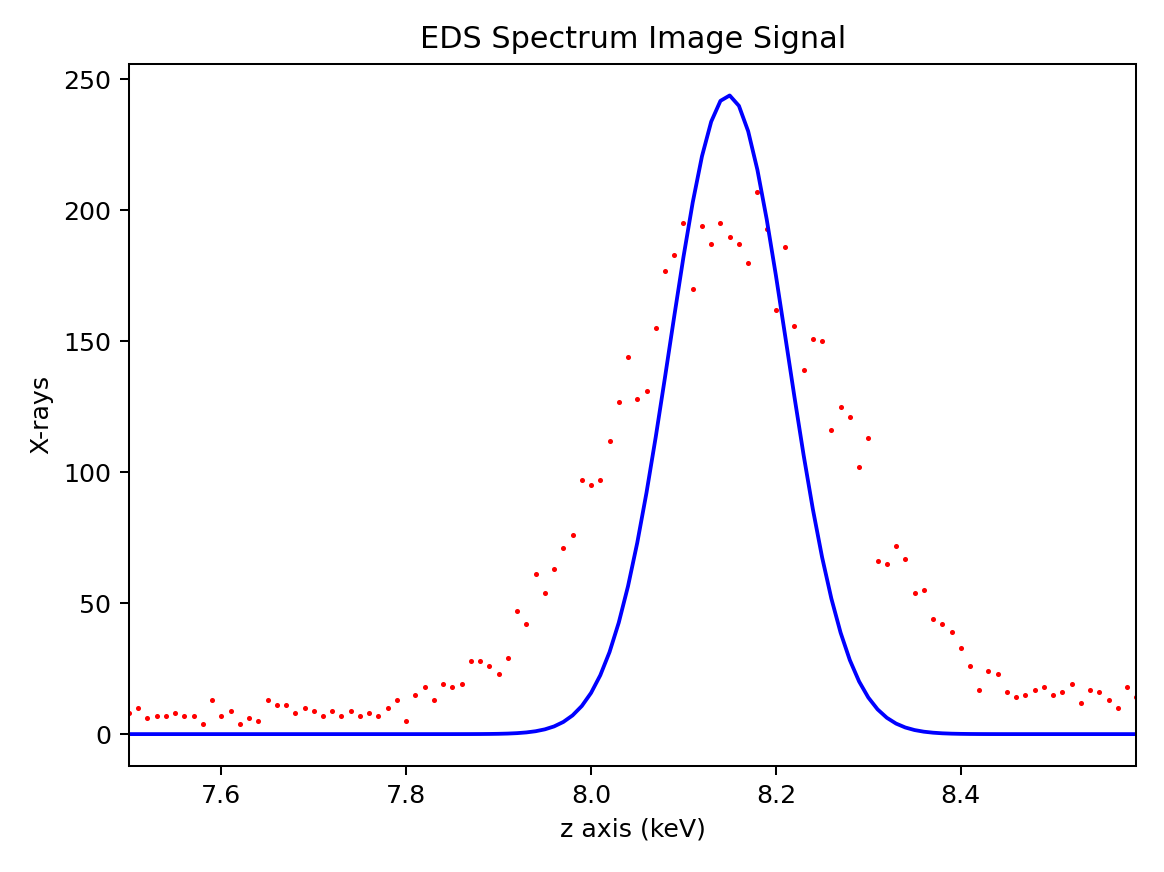

expected Cu pos :  8.0478
measured Cu pos :  8.1484103241179
offset :  -0.10061032411790016


/tmp/ipykernel_40017/2809788393.py:2: DeprecationWarning: use "HasTraits.trait_get" instead
  meas_Cu_pos = m_Cu.components.Cu_Ka.centre.get()['value']#get measured Cu position


In [7]:
m_Cu.plot()
meas_Cu_pos = m_Cu.components.Cu_Ka.centre.get()['value']#get measured Cu position
print('expected Cu pos : ' , real_Cu_pos)
print('measured Cu pos : ' , meas_Cu_pos)
offset_Cu =  real_Cu_pos - meas_Cu_pos 
print('offset : ' ,offset_Cu)

<IPython.core.display.Javascript object>


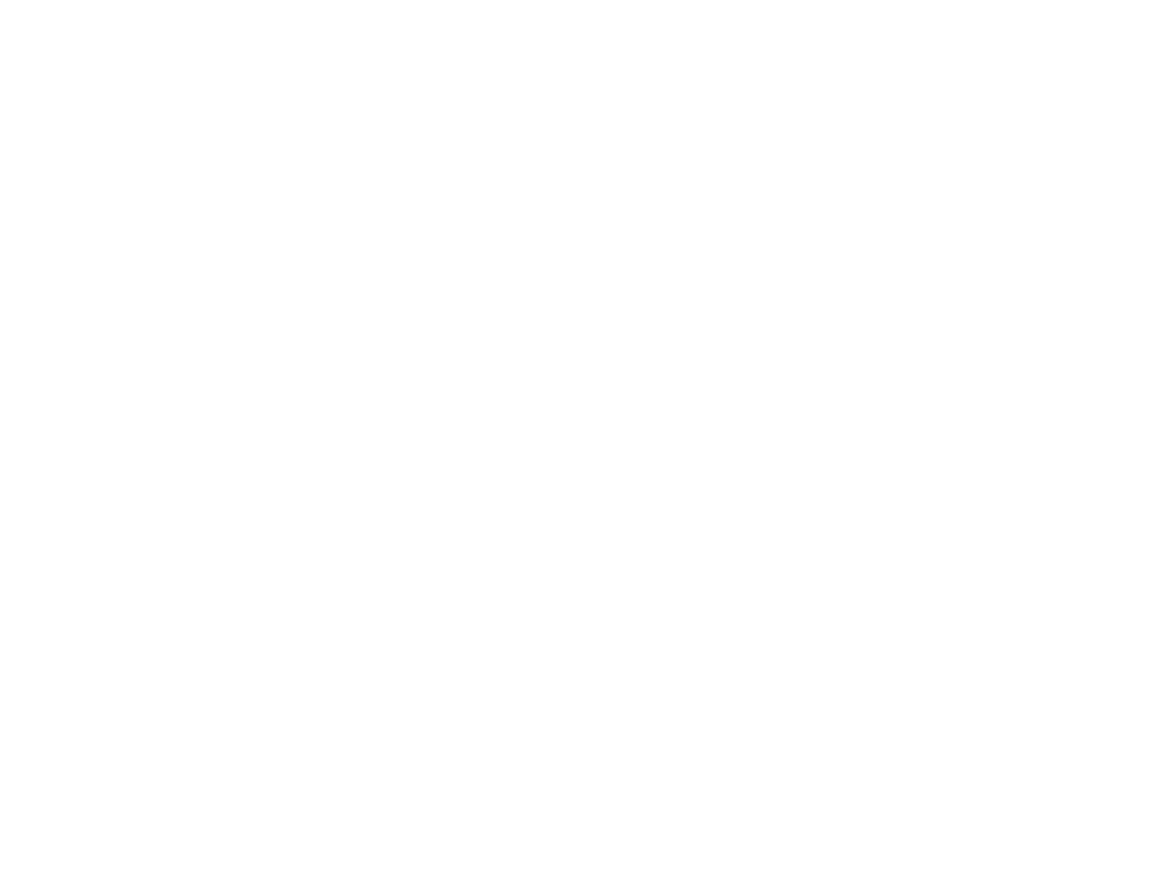

In [8]:
#set offset to data and check
#set offset to full data 
SI.axes_manager[-1].offset = offset_Cu
SI_sum = SI.sum()
SI_sum.add_elements(['Cu'])
SI_sum.plot(True)

In [9]:
#find peaks, play with parameters to get good output
P = SI_sum.find_peaks1D_ohaver(amp_thresh= 15,medfilt_radius=21, maxpeakn=40)[0]
peak_list = []
for this_P in P:
    #print(this_P['position'])
    peak_list.append(hs.eds.get_xray_lines_near_energy(this_P['position'],width = 0.1,  only_lines=['Ka', 'Kb', 'La', 'Lb']),)
    print(this_P, ' : ', peak_list[-1])

[########################################] | 100% Completed |  0.1s
(0.49054996, 5.75108308, 0.57075951)  :  ['V_La', 'O_Ka', 'Ti_La']
(0.53529236, 5.7557235, 0.42189503)  :  ['O_Ka', 'V_La', 'Cr_La']
(0.77909661, 3.98217264, nan)  :  ['Co_La']
(0.96595166, 5.79620696, nan)  :  ['Cu_La', 'Zn_La']
(1.13570492, 4.63162336, 0.27813066)  :  ['Ga_La']
(1.17711076, 4.39944955, nan)  :  ['Ge_La']
(1.30379272, 4.18572526, nan)  :  ['Mg_Kb', 'As_La']
(1.75328375, 8.43986424, 0.25088636)  :  ['Si_Ka']
(2.15107567, 11.43010145, 0.35581737)  :  ['P_Kb', 'Nb_La']
(2.86971838, 11.0710925, 0.36973594)  :  ['Pd_La']
(3.08363754, 5.63557121, 0.85512145)  :  []
(3.21830314, 5.28815315, 0.3914143)  :  ['Ar_Kb']
(3.60795821, 3.34696755, 0.29550876)  :  ['Sb_La', 'K_Kb']
(4.21007652, 2.89517373, 0.16560569)  :  []
(4.50251585, 3.01132886, 0.39406142)  :  ['Ti_Ka', 'Ba_La', 'Sc_Kb']
(5.63979207, 3.00703245, 0.14289312)  :  ['Sm_La']
(8.05804113, 9.83887434, 0.36969981)  :  ['Cu_Ka']
(8.38196201, 3.24992857,

/dls_sw/apps/python/miniforge/4.10.0-0/envs/epsic3.10/lib/python3.10/site-packages/scipy/signal/_signaltools.py:1531: UserWarning: kernel_size exceeds volume extent: the volume will be zero-padded.
  warnings.warn('kernel_size exceeds volume extent: the volume will be '


In [10]:
#clear peaks 
SI_sum.metadata['Sample']['elements'] = []
SI_sum.metadata['Sample'][' xray_lines '] = []

<IPython.core.display.Javascript object>


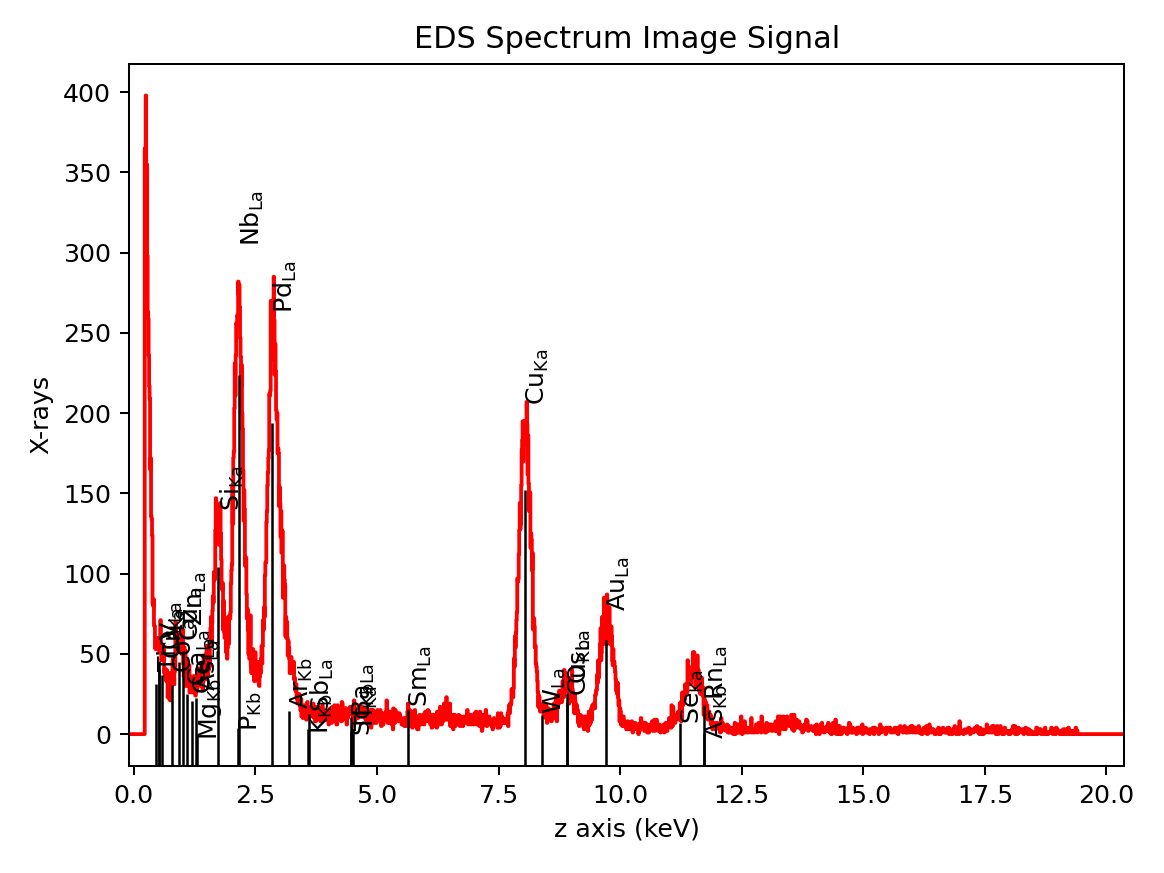

In [11]:
#add lines to SI_sum object
for these_peaks in peak_list:
    #print(these_peaks)
    SI_sum.add_lines(these_peaks)
SI_sum.plot(True)